In [1]:
from matplotlib import pyplot as plt
import matplotlib.offsetbox as offsetbox
import numpy as np
import h5py

import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img

import umap
from sklearn.manifold import TSNE

from shapes_utils import *

c:\Users\MaryBeth\anaconda3\envs\latent\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset = h5py.File('3dshapes.h5', 'r')
print(dataset.keys())
images = dataset['images']  # array shape [480000,64,64,3], uint8 in range(256)
labels = dataset['labels']  # array shape [480000,6], float64
image_shape = images.shape[1:]  # [64,64,3]
label_shape = labels.shape[1:]  # [6]
n_samples = labels.shape[0]  # 10*10*10*8*4*15=480000

#_FACTORS_IN_ORDER = ['floor_hue', 'wall_hue', 'object_hue', 'scale', 'shape',
#                     'orientation']
#_NUM_VALUES_PER_FACTOR = {'floor_hue': 10, 'wall_hue': 10, 'object_hue': 10, 
#                          'scale': 8, 'shape': 4, 'orientation': 15}

<KeysViewHDF5 ['images', 'labels']>


# Examine the dataset

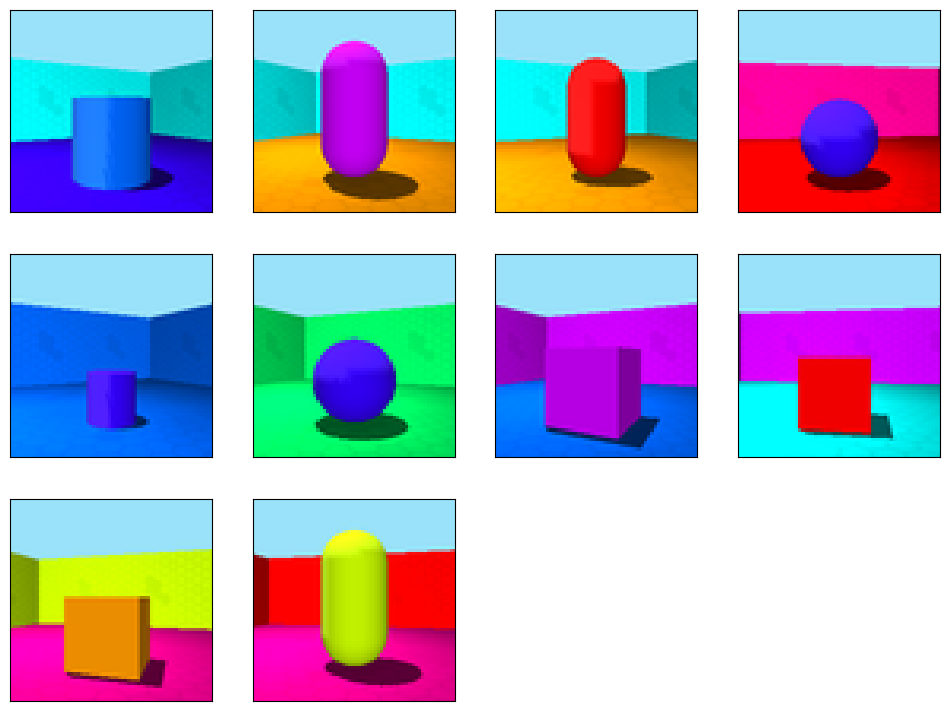

In [3]:
batch_size =  10
img_batch = sample_random_batch(batch_size, n_samples, images)
show_images_grid(img_batch)

In [4]:
batch_size = 100
img_batch = sample_random_batch(batch_size, n_samples, images)

# Extract features with ResNet50 pretrained on ImageNet

In [5]:
model = ResNet50(weights='imagenet', include_top=False)

In [6]:
features_resnet = [extract_features(img, model) for img in img_batch]
features_array_resnet = np.array(features_resnet)
features_reshaped_resnet = features_array_resnet.reshape((features_array_resnet.shape[0], -1))

1/1 [==============================] - 0s 110ms/step


In [7]:
print(np.shape(features_reshaped_resnet))

(100, 100352)


# UMAP embedding

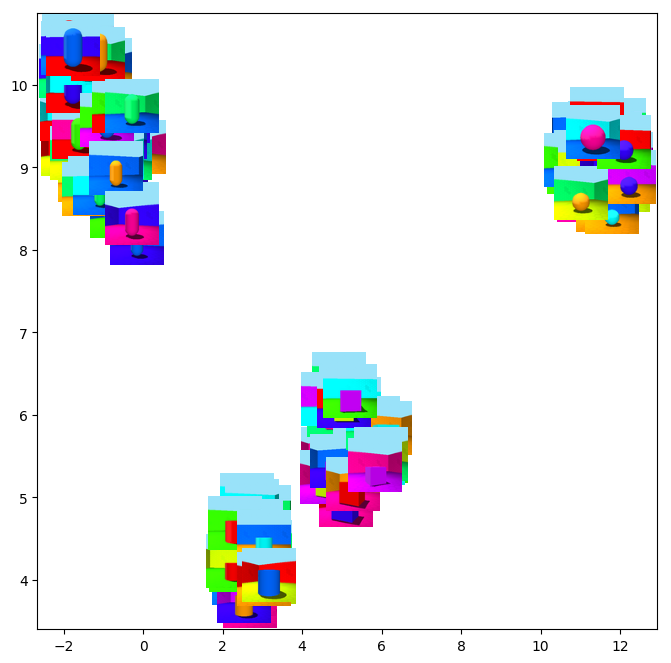

In [8]:
u_map = umap.UMAP()
umap_embedding = u_map.fit_transform(features_reshaped_resnet)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 8))

# Scatter plot with images
imscatter(umap_embedding[:, 0], umap_embedding[:, 1], img_batch, zoom=0.6, ax=ax)

plt.show()

# t-SNE embedding

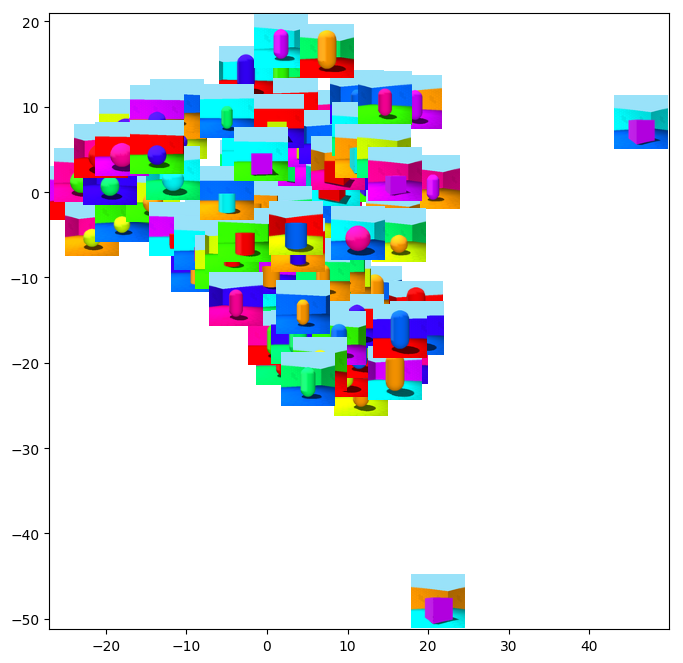

In [9]:
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_embedding = tsne.fit_transform(features_reshaped_resnet)

fig, ax = plt.subplots(figsize=(8, 8))

# Scatter plot with images
imscatter(tsne_embedding[:, 0], tsne_embedding[:, 1], img_batch, zoom=0.6, ax=ax)

plt.show()

# Extract features with InceptionV3 pretrained on ImageNet

In [10]:
model = InceptionV3(weights='imagenet', include_top=False)

In [11]:
features = [extract_features(img, model) for img in img_batch]
features_array = np.array(features)
features_reshaped = features_array.reshape((features_array.shape[0], -1))

1/1 [==============================] - 0s 65ms/step


# UMAP embedding

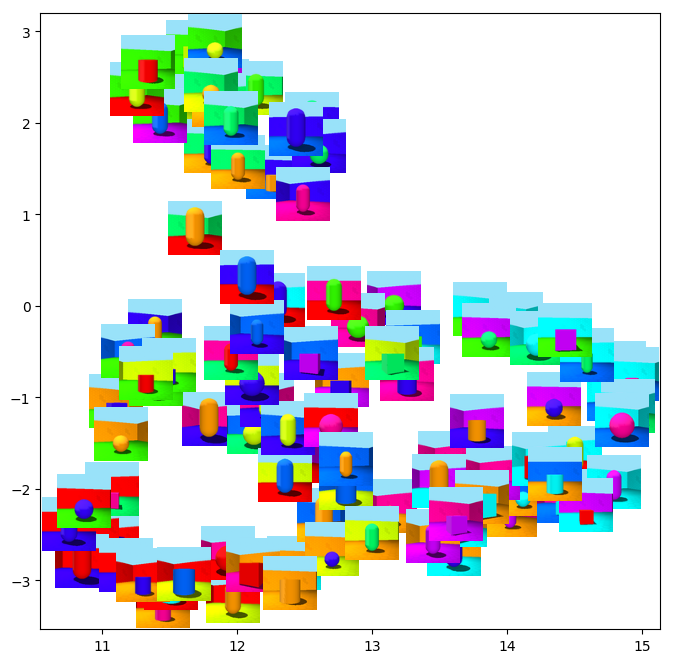

In [12]:
u_map = umap.UMAP()
umap_embedding = u_map.fit_transform(features_reshaped)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 8))

# Scatter plot with images
imscatter(umap_embedding[:, 0], umap_embedding[:, 1], img_batch, zoom=0.6, ax=ax)

plt.show()

# t-SNE embedding

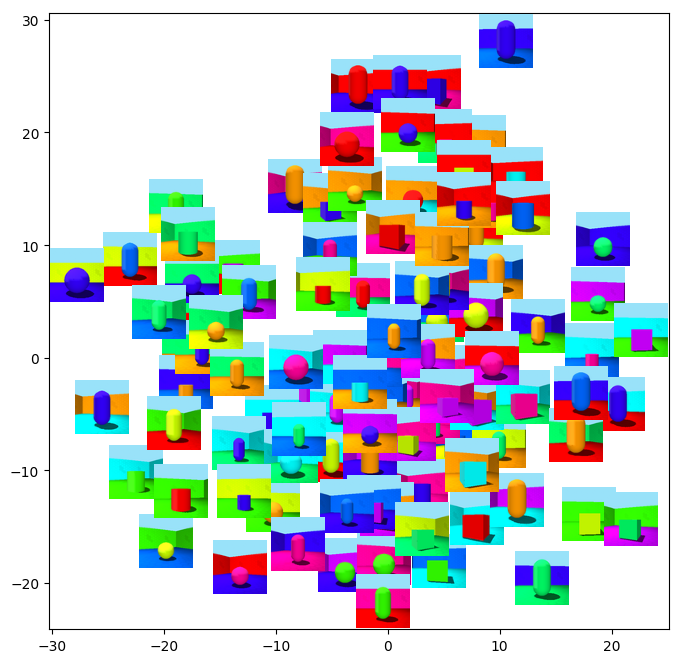

In [13]:
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_embedding = tsne.fit_transform(features_reshaped)

fig, ax = plt.subplots(figsize=(8, 8))

# Scatter plot with images
imscatter(tsne_embedding[:, 0], tsne_embedding[:, 1], img_batch, zoom=0.6, ax=ax)

plt.show()